<h1>Содержание:<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Предобработка данных</a></span></li></ul></li><li><span><a href="#Обучение-моделей" data-toc-modified-id="Обучение-моделей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Обучение моделей</a></span><ul class="toc-item"><li><span><a href="#LinearRegression" data-toc-modified-id="LinearRegression-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>LinearRegression</a></span></li><li><span><a href="#Decision-Tree" data-toc-modified-id="Decision-Tree-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Decision Tree</a></span></li><li><span><a href="#CatBoost" data-toc-modified-id="CatBoost-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>CatBoost</a></span></li><li><span><a href="#LightGBM" data-toc-modified-id="LightGBM-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>LightGBM</a></span></li></ul></li><li><span><a href="#Анализ-моделей" data-toc-modified-id="Анализ-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Анализ моделей</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Определение стоимости автомобилей

Сервис по продаже автомобилей с пробегом «Не бит, не крашен» разрабатывает приложение для привлечения новых клиентов. В нём можно быстро узнать рыночную стоимость своего автомобиля. В вашем распоряжении исторические данные: технические характеристики, комплектации и цены автомобилей. Вам нужно построить модель для определения стоимости. 

Заказчику важны:

- качество предсказания;
- скорость предсказания;
- время обучения.

## Подготовка данных

### Изучение данных

Подключаем библиотеки:

In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

Загрузим данные из файлов, выведем первые 10 строк таблиц для первого взгляда на данные.

In [2]:
df = pd.read_csv('/datasets/autos.csv')
df.head(10)

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,RegistrationMonth,FuelType,Brand,Repaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,2016-03-24 11:52:17,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21
5,2016-04-04 17:36:23,650,sedan,1995,manual,102,3er,150000,10,petrol,bmw,yes,2016-04-04 00:00:00,0,33775,2016-04-06 19:17:07
6,2016-04-01 20:48:51,2200,convertible,2004,manual,109,2_reihe,150000,8,petrol,peugeot,no,2016-04-01 00:00:00,0,67112,2016-04-05 18:18:39
7,2016-03-21 18:54:38,0,sedan,1980,manual,50,other,40000,7,petrol,volkswagen,no,2016-03-21 00:00:00,0,19348,2016-03-25 16:47:58
8,2016-04-04 23:42:13,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,2016-04-04 00:00:00,0,94505,2016-04-04 23:42:13
9,2016-03-17 10:53:50,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,2016-03-17 00:00:00,0,27472,2016-03-31 17:17:06


С помощью метода info() изучим структуры таблиц: типы данных, количество строк, столбцов, пропущенных данных

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
df.describe()

,Price,RegistrationYear,Power,Kilometer,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


### Предобработка данных

Есть пропуски в нескольких категориальных признаках ('VehicleType', 'Gearbox', 'Model', 'FuelType', 'Repaired'). Заполняю их значением 'unknown' и 'other'. В тех случаях если еть значение 'other', заменим пропуски на 'other'

In [5]:
print('Уникальные значения  VehicleType', df['VehicleType'].unique())
print('Уникальные значения  Gearbox', df['Gearbox'].unique())
print('Уникальные значения  Model', df['Model'].unique())
print('Уникальные значения  FuelType', df['FuelType'].unique())
print('Уникальные значения  Repaired', df['Repaired'].unique())

Уникальные значения  VehicleType [nan 'coupe' 'suv' 'small' 'sedan' 'convertible' 'bus' 'wagon' 'other']
Уникальные значения  Gearbox ['manual' 'auto' nan]
Уникальные значения  Model ['golf' nan 'grand' 'fabia' '3er' '2_reihe' 'other' 'c_max' '3_reihe'
 'passat' 'navara' 'ka' 'polo' 'twingo' 'a_klasse' 'scirocco' '5er'
 'meriva' 'arosa' 'c4' 'civic' 'transporter' 'punto' 'e_klasse' 'clio'
 'kadett' 'kangoo' 'corsa' 'one' 'fortwo' '1er' 'b_klasse' 'signum'
 'astra' 'a8' 'jetta' 'fiesta' 'c_klasse' 'micra' 'vito' 'sprinter' '156'
 'escort' 'forester' 'xc_reihe' 'scenic' 'a4' 'a1' 'insignia' 'combo'
 'focus' 'tt' 'a6' 'jazz' 'omega' 'slk' '7er' '80' '147' '100' 'z_reihe'
 'sportage' 'sorento' 'v40' 'ibiza' 'mustang' 'eos' 'touran' 'getz' 'a3'
 'almera' 'megane' 'lupo' 'r19' 'zafira' 'caddy' 'mondeo' 'cordoba' 'colt'
 'impreza' 'vectra' 'berlingo' 'tiguan' 'i_reihe' 'espace' 'sharan'
 '6_reihe' 'panda' 'up' 'seicento' 'ceed' '5_reihe' 'yeti' 'octavia' 'mii'
 'rx_reihe' '6er' 'modus' 'fox' 

In [6]:
df['VehicleType'] = df['VehicleType'].fillna('other')
df['Gearbox'] = df['Gearbox'].fillna('unknown')
df['Model'] = df['Model'].fillna('other')
df['FuelType'] = df['FuelType'].fillna('other')
df['Repaired'] = df['Repaired'].fillna('unknown')

Проверим:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        354369 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            354369 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              354369 non-null  object
 7   Kilometer          354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           354369 non-null  object
 10  Brand              354369 non-null  object
 11  Repaired           354369 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

Пропусков больше нет.

**Удалим из датасета ненужные признаки.**

- Признаки NumberOfPictures, PostalCode не несут полезной информации, удалим их.
- Также DateCrawled повторяет дату в признаке DateCreated.
- RegistrationMonth по смыслу вряд ли влияет на цену автомобиля.

In [8]:
df = df.drop(['DateCrawled', 'RegistrationMonth', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen'], axis=1)
df.head(10)

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
0,480,other,1993,manual,0,golf,150000,petrol,volkswagen,unknown
1,18300,coupe,2011,manual,190,other,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes
6,2200,convertible,2004,manual,109,2_reihe,150000,petrol,peugeot,no
7,0,sedan,1980,manual,50,other,40000,petrol,volkswagen,no
8,14500,bus,2014,manual,125,c_max,30000,petrol,ford,unknown
9,999,small,1998,manual,101,golf,150000,other,volkswagen,unknown


**Посмотрим есть ли дубликаты:**

In [9]:
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 45191


In [10]:
df[df.duplicated() == True]

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
1117,950,small,1999,manual,60,polo,150000,petrol,volkswagen,no
1396,0,other,2000,unknown,0,other,150000,other,volvo,unknown
2169,0,coupe,2002,manual,129,c_klasse,150000,petrol,mercedes_benz,no
2833,1499,small,2001,manual,58,corsa,150000,petrol,opel,no
3025,2800,wagon,2005,unknown,0,touran,150000,gasoline,volkswagen,no
...,...,...,...,...,...,...,...,...,...,...
354352,6500,sedan,2003,auto,145,e_klasse,150000,gasoline,mercedes_benz,no
354355,4400,sedan,2008,manual,105,leon,150000,gasoline,seat,no
354358,1490,small,1998,manual,50,lupo,150000,petrol,volkswagen,no
354359,7900,sedan,2010,manual,140,golf,150000,gasoline,volkswagen,no


Удалим дубликаты.

In [11]:
df.drop_duplicates(inplace=True)
print('Количество дубликатов:', df.duplicated().sum())

Количество дубликатов: 0


**Посмотрим какое распределение целевого признака 'Price' (цены)**

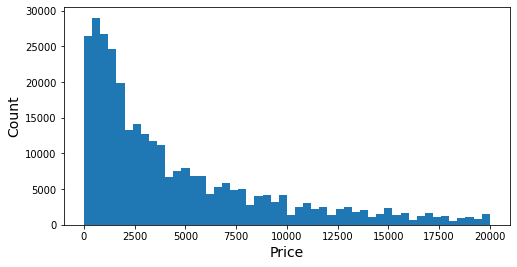

In [12]:
fig, ax = plt.subplots()
fig.set_size_inches(8,4)
ax.hist(df['Price'], bins=50)
ax.set_xlabel('Price', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
plt.show()

Нулевые значения цены является какой-то аномалией, скорее всего цена не была указана или указана неверно. Избавимся от таких значений, чтобы не прогнозировать нулевую цену.

In [13]:
df = df[~(df['Price'] == 0)]
df.describe()

,Price,RegistrationYear,Power,Kilometer
count,300316.000000,300316.000000,300316.000000,300316.000000
mean,4620.331521,2004.246257,111.730840,127309.084431
std,4565.437727,83.018828,199.077988,38217.881409
min,1.000000,1000.000000,0.000000,5000.000000
25%,1200.000000,1999.000000,69.000000,125000.000000
50%,2900.000000,2003.000000,105.000000,150000.000000
75%,6650.000000,2008.000000,143.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


**Проверим есть ли у нас нулевые значения пробега и мощности**

In [14]:
df[df['Kilometer'] == 0].count()

Price               0
VehicleType         0
RegistrationYear    0
Gearbox             0
Power               0
Model               0
Kilometer           0
FuelType            0
Brand               0
Repaired            0
dtype: int64

Данных с нулевым пробегом нет

In [15]:
df[df['Power'] == 0].count()

Price               32943
VehicleType         32943
RegistrationYear    32943
Gearbox             32943
Power               32943
Model               32943
Kilometer           32943
FuelType            32943
Brand               32943
Repaired            32943
dtype: int64

Данные с нулевой мощностью остались. Мы планируем прогнозировать цену реального автомобиля, а значит мощность у него не нулевая, поэтому удалим нулевые данные.

In [16]:
df = df[~(df['Power'] == 0)]
df.describe()

,Price,RegistrationYear,Power,Kilometer
count,267373.000000,267373.000000,267373.000000,267373.000000
mean,4889.721595,2003.610985,125.497186,127395.604642
std,4635.339966,34.329792,206.851347,37428.173128
min,1.000000,1000.000000,1.000000,5000.000000
25%,1350.000000,1999.000000,80.000000,125000.000000
50%,3200.000000,2004.000000,113.000000,150000.000000
75%,6999.000000,2008.000000,150.000000,150000.000000
max,20000.000000,9999.000000,20000.000000,150000.000000


In [17]:
df.head()

,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Kilometer,FuelType,Brand,Repaired
1,18300,coupe,2011,manual,190,other,125000,gasoline,audi,yes
2,9800,suv,2004,auto,163,grand,125000,gasoline,jeep,unknown
3,1500,small,2001,manual,75,golf,150000,petrol,volkswagen,no
4,3600,small,2008,manual,69,fabia,90000,gasoline,skoda,no
5,650,sedan,1995,manual,102,3er,150000,petrol,bmw,yes


**Проверим есть ли у нас аномалии в RegistrationYear**

In [18]:
print('Уникальные значения года:', df['RegistrationYear'].unique())
print('Количество записей с годом меньше 1960:', df[(df['RegistrationYear'] <= 1960)].count())
print('Количество записей с годом больше 2023:', df[(df['RegistrationYear'] >= 2023)].count())

Уникальные значения года: [2011 2004 2001 2008 1995 2014 1998 2005 2016 2007 2009 2002 2018 1997
 1990 2017 1981 2003 1991 1984 2006 1999 2012 1994 2010 2000 1992 2013
 1996 1989 2015 1993 1985 1982 1983 1973 1969 1971 1987 1988 1980 1970
 1986 1976 1965 1945 1974 1955 1978 1979 1972 1977 1961 1975 1968 1963
 1966 1964 1958 1959 1956 1941 1960 1500 1962 1929 1957 1910 1940 1967
 1949 1937 1800 1953 2019 1954 1234 2900 6000 5911 1400 5000 4000 8000
 1932 1951 1952 1950 4800 1942 1935 6500 1923 1000 1930 9999 1943 1938
 1936 1928 3000 2800 1931 1948 4500 1927 1933 8200 1947 1944 1600]
Количество записей с годом меньше 1960: Price               221
VehicleType         221
RegistrationYear    221
Gearbox             221
Power               221
Model               221
Kilometer           221
FuelType            221
Brand               221
Repaired            221
dtype: int64
Количество записей с годом больше 2023: Price               22
VehicleType         22
RegistrationYear    22
Gearbox 

Аномальных значений не много, можно удалить

In [19]:
df = df[(df['RegistrationYear'] >= 1960) & (df['RegistrationYear'] <= 2023)]

#проверим
df['RegistrationYear'].unique()

array([2011, 2004, 2001, 2008, 1995, 2014, 1998, 2005, 2016, 2007, 2009,
       2002, 2018, 1997, 1990, 2017, 1981, 2003, 1991, 1984, 2006, 1999,
       2012, 1994, 2010, 2000, 1992, 2013, 1996, 1989, 2015, 1993, 1985,
       1982, 1983, 1973, 1969, 1971, 1987, 1988, 1980, 1970, 1986, 1976,
       1965, 1974, 1978, 1979, 1972, 1977, 1961, 1975, 1968, 1963, 1966,
       1964, 1960, 1962, 1967, 2019])

**Вывод:**
- Удалили признаки NumberOfPictures, PostalCode, DateCrawled, DateCreated и RegistrationMonth.
- Удалили данные с нулевыми значениями 'Price' и 'Power'
- Удалили аномалии в 'RegistrationYear'
- Удалили дубликаты
- Заменили пропуски значением 'unknown' и 'other'

## Обучение моделей

Разделим датасет на обучающую, валидационную и тестовую выборку в пропорции 3:1:1

In [20]:
features = df.drop(['Price'], axis=1)
target = df['Price']

In [21]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.4, random_state=91)
features_valid, features_test, target_valid, target_test = train_test_split(features_test, target_test, test_size=0.5, random_state=91)

In [22]:
print('Размер тренировочной выборки:', features_train.shape)
print('Размер валидационной выборки:', features_valid.shape)
print('Размер тестовой выборки:', features_test.shape)

Размер тренировочной выборки: (160312, 9)
Размер валидационной выборки: (53437, 9)
Размер тестовой выборки: (53438, 9)


### LinearRegression

Закодируем категориальные признаки техникой Ordinal Encoder

In [23]:
# категориальные признаки
cat_features = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand', 'Repaired']

In [24]:
# скопируем данные для надежности
features_encoded = features.copy()
features_encoded[cat_features] = OrdinalEncoder().fit_transform(features_encoded[cat_features])

# заново разделим выборки
features_train_encoded, features_test_encoded, target_train_encoded, target_test_encoded = train_test_split(features_encoded, target, test_size=0.4, random_state=91)
features_valid_encoded, features_test_encoded, target_valid_encoded, target_test_encoded = train_test_split(features_test_encoded, target_test_encoded, test_size=0.5, random_state=91)

In [25]:
lr = LinearRegression().fit(features_train_encoded, target_train_encoded)
pred_lr = lr.predict(features_valid_encoded)
print(f'RMSE of Linear Regression: {mean_squared_error(target_valid_encoded, pred_lr, squared=False)}')

RMSE of Linear Regression: 3571.3311889061024


По условию задания значение метрики RMSE должно быть меньше 2500. Linear Regression не подходит

###  Decision Tree

In [26]:
dt = DecisionTreeRegressor(max_depth=10).fit(features_train_encoded, target_train)
pred_dt = dt.predict(features_valid_encoded)
print(f'RMSE of Desicion Tree: {mean_squared_error(target_valid, pred_dt, squared=False)}')

RMSE of Desicion Tree: 2053.784055279156


По условию задания значение метрики RMSE должно быть меньше 2500. Decision Tree подходит

### CatBoost

In [27]:
%%time

cat_model = CatBoostRegressor(cat_features=cat_features,
                          loss_function='RMSE',
                          verbose=50,
                          thread_count=-1,
                          random_seed=91)

grid = {'learning_rate': [0.1, 0.5],
        'depth': [10, 12],
        'l2_leaf_reg': [3, 7],
        'iterations' : [50, 200]}

grid_search_result = cat_model.grid_search(grid, 
                                       X=features_train, 
                                       y=target_train,
                                       plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 6148.0583176	test: 6172.7400278	best: 6172.7400278 (0)	total: 153ms	remaining: 7.47s
49:	learn: 1761.4021376	test: 1806.9057280	best: 1806.9057280 (49)	total: 4.08s	remaining: 0us

bestTest = 1806.905728
bestIteration = 49

0:	loss: 1806.9057280	best: 1806.9057280 (0)	total: 4.85s	remaining: 1m 12s
0:	learn: 4004.5455307	test: 4027.1356162	best: 4027.1356162 (0)	total: 89.9ms	remaining: 4.4s
49:	learn: 1561.6330412	test: 1723.8991122	best: 1723.8991122 (49)	total: 4.03s	remaining: 0us

bestTest = 1723.899112
bestIteration = 49

1:	loss: 1723.8991122	best: 1723.8991122 (1)	total: 8.9s	remaining: 1m 2s
0:	learn: 6150.0285087	test: 6174.6629339	best: 6174.6629339 (0)	total: 94.4ms	remaining: 4.62s
49:	learn: 1776.4153296	test: 1817.6729247	best: 1817.6729247 (49)	total: 4.34s	remaining: 0us

bestTest = 1817.672925
bestIteration = 49

2:	loss: 1817.6729247	best: 1723.8991122 (1)	total: 13.3s	remaining: 57.5s
0:	learn: 4013.0679215	test: 4035.4165380	best: 4035.4165380 (0)	total: 

In [28]:
grid_search_result['params']

{'depth': 12, 'l2_leaf_reg': 3, 'iterations': 200, 'learning_rate': 0.1}

In [29]:
%%time

cat_model = CatBoostRegressor(cat_features=cat_features,
                          loss_function='RMSE',
                          **grid_search_result['params'],
                          verbose=20,
                          thread_count=-1,
                          random_seed=91)
cat_model.fit(features_train, target_train)
pred_cat = cat_model.predict(features_valid)
print(f'RMSE of CatBoostRegressor: {mean_squared_error(target_valid, pred_cat, squared=False)}')

0:	learn: 4291.3686452	total: 528ms	remaining: 1m 44s
20:	learn: 1935.7480349	total: 11.2s	remaining: 1m 35s
40:	learn: 1706.3512528	total: 21.9s	remaining: 1m 25s
60:	learn: 1643.8538856	total: 33s	remaining: 1m 15s
80:	learn: 1604.1017133	total: 44.2s	remaining: 1m 4s
100:	learn: 1573.6791795	total: 55.2s	remaining: 54.1s
120:	learn: 1545.3815121	total: 1m 6s	remaining: 43.6s
140:	learn: 1522.4659985	total: 1m 18s	remaining: 32.8s
160:	learn: 1503.4558518	total: 1m 30s	remaining: 21.9s
180:	learn: 1485.8516566	total: 1m 42s	remaining: 10.8s
199:	learn: 1469.6052181	total: 1m 54s	remaining: 0us
RMSE of CatBoostRegressor: 1656.4554774506148
CPU times: user 1min 54s, sys: 380 ms, total: 1min 54s
Wall time: 1min 55s


По условию задания значение метрики RMSE должно быть меньше 2500. CatBoostRegressor подходит и RMSE получилось меньше чем в Decision Tree

### LightGBM

In [30]:
%%time

params = {
    'num_leaves': [50, 100],
    'max_depth': [10, 12],
}

lgb_model = LGBMRegressor(n_estimators=1000,
                          random_state=91,
                          n_jobs=-1)

grid = GridSearchCV(estimator=lgb_model, param_grid=params, scoring='neg_root_mean_squared_error', cv=5)

grid.fit(features_train_encoded, target_train_encoded)

print(grid.best_estimator_)
print(grid.best_params_)

In [31]:
print(grid.best_params_)

Лучшие параметры: {'num_leaves': 100, 'max_depth': 12}

In [32]:
lgb_model = LGBMRegressor(num_leaves = 100, 
                          max_depth = 12, 
                          random_state=91,
                          n_jobs=-1)
lgb_model.fit(features_train_encoded, target_train)
pred_lgb = lgb_model.predict(features_valid_encoded)
print(f'RMSE of LGBMRegressor: {mean_squared_error(target_valid, pred_lgb, squared=False)}')

RMSE of LGBMRegressor: 1682.386171406922


**Вывод:**
- По оценке RMSE градиентный бустинг оказывается лучше чем Linear Regression и Decision Tree.

## Анализ моделей

Сравним данные модели по:

- качеству предсказания
- скорости предсказания
- времени обучения

In [33]:
list_quality = []
list_predict = []
list_train   = []

Узнаем время обучения LinearRegression

In [34]:
start = time.time()

lr = LinearRegression().fit(features_train_encoded, target_train_encoded)

list_train.append(time.time() - start)

Узнаем время обучения Decision Tree

In [35]:
start = time.time()

dt = DecisionTreeRegressor(max_depth=10).fit(features_train_encoded, target_train)

list_train.append(time.time() - start)

Узнаем время обучения CatBoostRegressor

In [36]:
start = time.time()

cat_model = CatBoostRegressor(cat_features=cat_features,
                          loss_function='RMSE',
                          **grid_search_result['params'],
                          silent=True,
                          thread_count=-1,
                          random_seed=91)
cat_model.fit(features_train, target_train)

list_train.append(time.time() - start)

Узнаем время обучения LGBMRegressor

In [37]:
start = time.time()

lgb_model = LGBMRegressor(num_leaves = 100, 
                          max_depth = 12, 
                          random_state=91,
                          n_jobs=-1)
lgb_model.fit(features_train_encoded, target_train)

list_train.append(time.time() - start)

Узнаем время предсказания LinearRegression

In [38]:
start = time.time()

pred_lr = lr.predict(features_valid_encoded)

list_predict.append(time.time() - start)

Узнаем время предсказания Decision Tree

In [39]:
start = time.time()

pred_dt = dt.predict(features_valid_encoded)

list_predict.append(time.time() - start)

Узнаем время предсказания CatBoostRegressor

In [40]:
start = time.time()

pred_cat = cat_model.predict(features_valid)

list_predict.append(time.time() - start)

Узнаем время предсказания LGBMRegressor

In [41]:
start = time.time()

pred_lgb = lgb_model.predict(features_valid_encoded)

list_predict.append(time.time() - start)

Посчитаем метрику RMSE для LinearRegression

In [42]:
list_quality.append(mean_squared_error(target_valid_encoded, pred_lr, squared=False))

Посчитаем метрику RMSE для Decision Tree

In [43]:
list_quality.append(mean_squared_error(target_valid_encoded, pred_dt, squared=False))

Посчитаем метрику RMSE для CatBoostRegressor

In [44]:
list_quality.append(mean_squared_error(target_valid, pred_cat, squared=False))

Посчитаем метрику RMSE для LGBMRegressor

In [45]:
list_quality.append(mean_squared_error(target_valid, pred_lgb, squared=False))

Объединим все данные в обну таблицу для наглядности

In [46]:
pd.DataFrame([list_train, list_predict, list_quality],
             index=['Train Time', 'Predict Time', 'RMSE'],
             columns=['LinearRegression', 'Decision Tree', 'CatBoost', 'LightGBM'])

,LinearRegression,Decision Tree,CatBoost,LightGBM
Train Time,0.060175,0.385756,118.563774,9.647319
Predict Time,0.003863,0.008028,0.253209,0.532291
RMSE,3571.331189,2053.815624,1656.455477,1682.386171


Самое низкое значение метрики RMSE получилось у библиотека CatBoost, по ней и проведем финальное тестирование на тестовой выборке

In [47]:
start = time.time()

pred_cat = cat_model.predict(features_test)

print('Время предсказания на тестовой выборке:', time.time() - start)
print(f'RMSE of CatBoostRegressor: {mean_squared_error(target_test, pred_cat, squared=False)}')

Время предсказания на тестовой выборке: 0.2575809955596924
RMSE of CatBoostRegressor: 1639.5533386745817


## Общий вывод

- Был проведён анализ данных, в ходе которого были обработаны пропущенные значения
- Были выявлены и удалены некоторые аномалии в данных
- Проведено сравнение линейной регрессии, случайного дерева и библиотек градиентного бустинга CatBoost и LightGBM
- С помощью кросс валидации были подобраны наилучшие параметры для CatBoostRegressor и LGBMRegressor
- Регрессия с помощью библиотек градиентного бустинга позволяет улучшить результат прогноза по сравнению с более простыми алгоритмами, но обучаются они дольше
- CatBoost оказался точнее